In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import load

array_path="/content/drive/MyDrive/TESE/RioFat/arrays"
os.chdir(array_path)

mascaras_epi=load('epi_mask_fat.npy')
mascaras_peri=load('convex_mask.npy')
fat_images=load('fat_images_fcon.npy')
dicom_images=load('dicom_images.npy')
fat_images_dicom=load('fat_images_dicom.npy')


Find transformation matrix

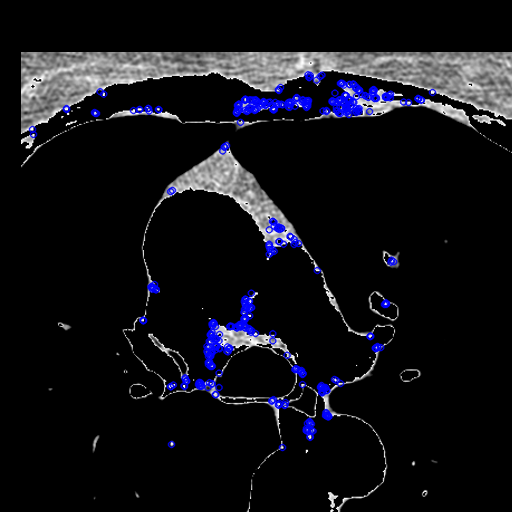

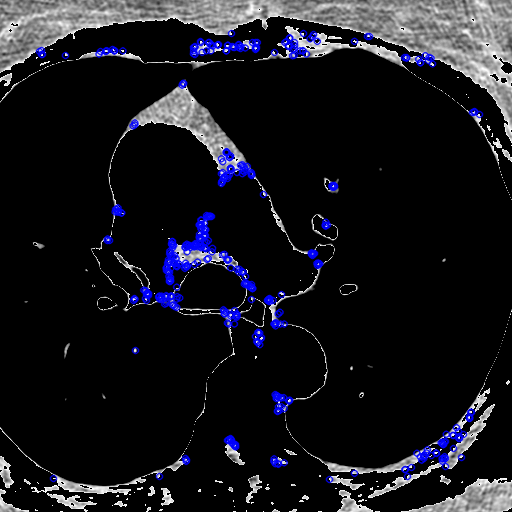

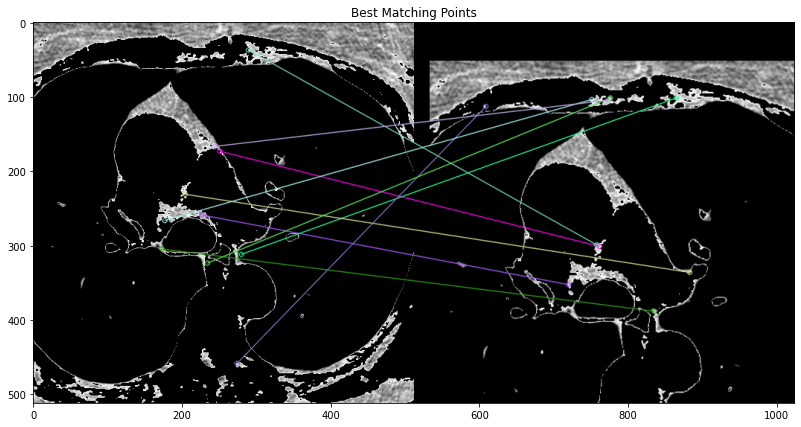

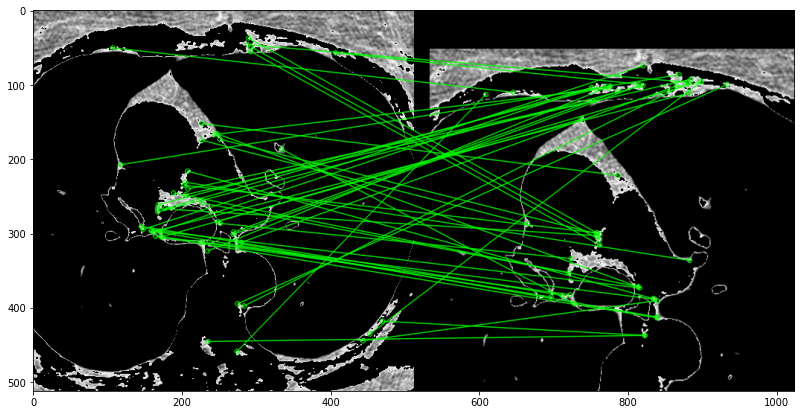

(<matplotlib.image.AxesImage at 0x7fb3db046bd0>, None)

In [ ]:
  import cv2
  import numpy as np
  from google.colab.patches import cv2_imshow

#transformation_matrix=[]

# esta função está a criar a matriz de transformação para todas as imagens

# Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(500)

# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
# (which is not required in this case).

  #IMAGEM FIXA USADA PARA REGISTATION (file)
  fixed_image =fat_images_dicom[148]

  #IMAGEM QUE SE MOVE QUE CONTEM A LABEL
  moving_image=fat_images[148]

  kp1, d1 = orb_detector.detectAndCompute(moving_image, None)
  kp2, d2 = orb_detector.detectAndCompute(fixed_image, None)

  imageresult = cv2.drawKeypoints(moving_image, kp1, None, color=(255,0,0), flags=0)
  imageresult1 = cv2.drawKeypoints(fixed_image, kp2, None, color=(255,0,0), flags=0)
  #displaying the resulting image as the output on the screen
  cv2_imshow(imageresult)
  cv2.waitKey()
  cv2_imshow(imageresult1)
# Match features between the two images.
# We create a Brute Force matcher with

# Hamming distance as measurement mode.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match the two sets of descriptors.
  matches = matcher.match(d1, d2)


# Sort matches on the basis of their Hamming distance.
  matches.sort(key = lambda x: x.distance)
  result = cv2.drawMatches(fixed_image, kp2, moving_image, kp1, matches[:10],None, flags = 2)

# Display the best matching points
  plt.rcParams['figure.figsize'] = [14.0, 7.0]
  plt.title('Best Matching Points')
  plt.imshow(result)
  plt.show()

# Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.1)]
  no_of_matches = len(matches)

  # store all the good matches as per Lowe's ratio test.
  #good = []
  #for m,n in matches:
    #if m.distance < 0.7*n.distance:
       # good.append(m)


# Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))

  for n in range(len(matches)):
    p1[n, :] = kp1[matches[n].queryIdx].pt
    p2[n, :] = kp2[matches[n].trainIdx].pt

# Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  matchesMask = mask.ravel().tolist()
  ##transformation_matrix.append(homography)
  draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
  img3 = cv2.drawMatches(fixed_image, kp2, moving_image, kp1,matches,None,**draw_params)
  plt.imshow(img3, 'gray'),plt.show()


Apply transformation matrix

In [ ]:
for i in range(len(dicom_images)):

    imagem_transformada = cv2.warpPerspective(fat_image[i],
					transformation_matrix[i], (512, 512))

In [ ]:
d1[0]

array([ 44, 166, 237, 117, 252,  91, 215, 184,  86, 174, 118, 170,  83,
       109, 144,  33,  89, 252, 230,  32, 172, 242, 237,  30, 110, 239,
       101, 149, 231, 232,  84,  99], dtype=uint8)

In [ ]:
matches